In [1]:
import seaborn as sns
import keras
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Lambda, MaxPooling2D # convolution layers
from tensorflow.keras.layers import Dense, Dropout, Flatten # core layers
from tensorflow.keras.optimizers import Adam

from keras.layers.normalization import BatchNormalization

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.utils.np_utils import to_categorical

from keras.datasets import mnist

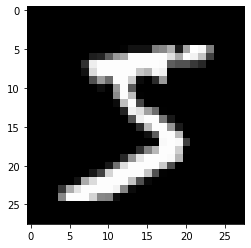

In [2]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.show()

In [4]:
np.where(y_train == 9)

(array([    4,    19,    22, ..., 59973, 59990, 59992]),)

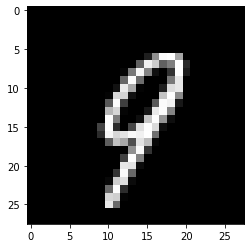

In [8]:
plt.imshow(X_train[22], cmap=plt.get_cmap('gray'))
plt.show()

In [3]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_train=X_train/255

X_test = X_test.reshape(10000, 28, 28, 1)
X_test = X_test / 255

In [4]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [5]:
model = Sequential()

model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
flatten (Flatten)            (None, 36864)             0         
_________________________________________________________________
dense (Dense)                (None, 10)                368650    
Total params: 387,466
Trainable params: 387,466
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs= 5, batch_size= 32)

Epoch 1/5
1875/1875 [==============================] - 74s 40ms/step - loss: 0.1212 - accuracy: 0.9622 - val_loss: 0.0559 - val_accuracy: 0.9817
Epoch 2/5
1875/1875 [==============================] - 71s 38ms/step - loss: 0.0441 - accuracy: 0.9868 - val_loss: 0.0408 - val_accuracy: 0.9885
Epoch 3/5
1875/1875 [==============================] - 73s 39ms/step - loss: 0.0273 - accuracy: 0.9911 - val_loss: 0.0459 - val_accuracy: 0.9864
Epoch 4/5
1875/1875 [==============================] - 72s 38ms/step - loss: 0.0174 - accuracy: 0.9944 - val_loss: 0.0472 - val_accuracy: 0.9870
Epoch 5/5
1875/1875 [==============================] - 72s 38ms/step - loss: 0.0116 - accuracy: 0.9965 - val_loss: 0.0687 - val_accuracy: 0.9838


In [5]:
model_ano = Sequential()
model_ano.add(Conv2D(32, (5, 5), padding="same", activation='relu', input_shape=(28, 28, 1)))
model_ano.add(MaxPooling2D(pool_size=(2, 2)))

# second set of CONV => RELU => POOL layers
model_ano.add(Conv2D(32, (3, 3), padding="same", activation='relu'))
model_ano.add(MaxPooling2D(pool_size=(2, 2)))

# first set of FC => RELU layers
model_ano.add(Flatten())
model_ano.add(Dense(64, activation='relu'))
model_ano.add(Dropout(0.5))

# second set of FC => RELU layers
model_ano.add(Dense(64, activation='relu'))
model_ano.add(Dropout(0.5))

# softmax classifier
model_ano.add(Dense(10, activation= 'softmax'))

model_ano.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                100416    
_________________________________________________________________
dropout (Dropout)            (None, 64)                0

In [6]:
model_ano.compile(loss="categorical_crossentropy", optimizer= Adam(lr= 1e-3), metrics=["accuracy"])
model_ano.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size= 128, epochs= 10, verbose=1)

Epoch 1/10
469/469 [==============================] - 35s 74ms/step - loss: 0.7260 - accuracy: 0.7580 - val_loss: 0.0975 - val_accuracy: 0.9719
Epoch 2/10
469/469 [==============================] - 45s 95ms/step - loss: 0.2851 - accuracy: 0.9138 - val_loss: 0.0695 - val_accuracy: 0.9797
Epoch 3/10
469/469 [==============================] - 31s 65ms/step - loss: 0.2187 - accuracy: 0.9345 - val_loss: 0.0523 - val_accuracy: 0.9855
Epoch 4/10
469/469 [==============================] - 32s 69ms/step - loss: 0.1805 - accuracy: 0.9460 - val_loss: 0.0455 - val_accuracy: 0.9873
Epoch 5/10
469/469 [==============================] - 35s 74ms/step - loss: 0.1578 - accuracy: 0.9529 - val_loss: 0.0432 - val_accuracy: 0.9876
Epoch 6/10
469/469 [==============================] - 33s 69ms/step - loss: 0.1496 - accuracy: 0.9555 - val_loss: 0.0404 - val_accuracy: 0.9884
Epoch 7/10
469/469 [==============================] - 34s 73ms/step - loss: 0.1329 - accuracy: 0.9611 - val_loss: 0.0350 - val_accuracy:

In [7]:
model_ano.save('mnist_digits.h5')

In [8]:
from tensorflow.keras.models import load_model
new_model = load_model('mnist_digits.h5')

In [9]:
import cv2 as cv

(700, 700)

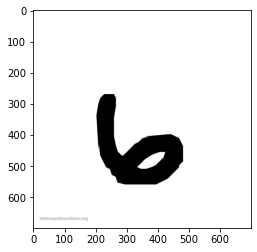

In [10]:
test_image = cv.imread('6.jpg',0)
plt.imshow(test_image,cmap='gray')
test_image.shape

In [11]:
import tensorflow as tf
ret, thresh = cv.threshold(test_image.copy(), 75, 255, cv.THRESH_BINARY_INV)
resized_digit = cv.resize(thresh, (28,28))
resized_digit = resized_digit.reshape(1, 28, 28, 1)
resized_digit = tf.cast(resized_digit, tf.float32)
prediction = new_model.predict(resized_digit)
print(prediction)

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


In [16]:
def prediction(test_image):
    classes = np.argmax(new_model.predict(test_image), axis=-1)
    print(classes)
#     if classes == [[0]]:
#         return 0
#     elif classes == [[1]]:
#         return 1
#     elif classes == [[2]]:
#         return 2
#     elif classes == [[3]]:
#         return 3
#     elif classes == [[4]]:
#         return 4
#     elif classes == [[5]]:
#         return 5
#     elif classes == [[6]]:
#         return 6
#     elif classes == [[7]]:
#         return 7
#     elif classes == [[8]]:
#         return 8
#     elif classes == [[9]]:
#         return 9

In [17]:
prediction(resized_digit)

[6]
